In [ ]:
import os, sys

from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
save_path = '/content/drive/MyDrive/Colab Notebooks/my_env'

os.symlink(save_path, my_path)
sys.path.insert(0, my_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pygad

In [ ]:
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   2403      0 --:--:-- --:--:-- --:--:--  2405
100   355  100   355    0     0   1124      0 --:--:-- --:--:-- --:--:--  1124
100 1299k  100 1299k    0     0  1084k      0  0:00:01  0:00:01 --:--:-- 2944k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

In [ ]:
!pip install --target=$my_path -U numpy
!pip install --target=$my_path pygad
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd drive/MyDrive/Colab\ Notebooks/my_env/ta-lib
!./configure --prefix=/usr
!make
!make install
!cd -
!pip install --target=$my_path ta-lib

In [ ]:
import talib
import numpy as np
import pygad

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from talib import *

In [ ]:
# Load the stock data
df = pd.read_csv("/content/drive/MyDrive/0_Capstone/data/크롤링_0514까지/new_KR7000020008.csv")
df
#new_KR7448740001.csv # 데이터가 적은 거
#new_KR7000020008.csv # 데이터가 많은 거

,TRD_DD,TDD_CLSPRC,FLUC_TP_CD,CMPPREVDD_PRC,FLUC_RT,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,ACC_TRDVOL,ACC_TRDVAL,MKTCAP,LIST_SHRS
0,2023/05/12,"8,460",2,-40,-0.47,"8,500","8,540","8,370","50,012","421,048,150","236,300,236,200","27,931,470"
1,2023/05/11,"8,500",2,-100,-1.16,"8,600","8,640","8,500","53,660","458,399,050","237,417,495,000","27,931,470"
2,2023/05/10,"8,600",2,-10,-0.12,"8,620","8,650","8,540","26,578","228,123,420","240,210,642,000","27,931,470"
3,2023/05/09,"8,610",1,30,0.35,"8,600","8,710","8,520","77,887","673,472,560","240,489,956,700","27,931,470"
4,2023/05/08,"8,580",2,-20,-0.23,"8,690","8,690","8,520","56,593","486,004,290","239,652,012,600","27,931,470"
...,...,...,...,...,...,...,...,...,...,...,...,...
331,2022/01/07,"14,600",1,350,2.46,"14,200","14,650","14,200","158,132","2,288,627,950","407,799,462,000","27,931,470"
332,2022/01/06,"14,250",2,-300,-2.06,"14,400","14,600","14,200","303,389","4,353,750,400","398,023,447,500","27,931,470"
333,2022/01/05,"14,550",2,-350,-2.35,"14,900","14,900","14,500","308,187","4,502,918,650","406,402,888,500","27,931,470"
334,2022/01/04,"14,900",2,-50,-0.33,"15,000","15,000","14,750","235,805","3,507,058,650","416,178,903,000","27,931,470"


------------------------------
# 전처리

**컬럼명 ta-lib에 맞게 변경**<br>
Timestamp: TRD_DD<br>
Close: TDD_CLSPRC<br>
Open: TDD_OPNPRC<br>
High: TDD_HGPRC<br>
Low: TDD_LWPRC<br>
Volume: ACC_TRDVOL<br>

In [ ]:
df.rename(columns={
    'TRD_DD': 'Timestamp',
    'TDD_CLSPRC': 'Close',
    'TDD_OPNPRC': 'Open',
    'TDD_HGPRC': 'High',
    'TDD_LWPRC': 'Low',
    'ACC_TRDVOL': 'Volume'
}, inplace=True)

datetime 타입 변경, float 쉼표 제거

In [ ]:
# datetime 타입 변경
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#쉼표 제거하기
def remove_commas(value):
    if isinstance(value, str):
        return int(value.replace(',', ''))
    return value

df = df.applymap(remove_commas)

In [ ]:
df

,Timestamp,Close,FLUC_TP_CD,CMPPREVDD_PRC,FLUC_RT,Open,High,Low,Volume,ACC_TRDVAL,MKTCAP,LIST_SHRS
0,2023-05-12,8460,2,-40,-0.47,8500,8540,8370,50012,421048150,236300236200,27931470
1,2023-05-11,8500,2,-100,-1.16,8600,8640,8500,53660,458399050,237417495000,27931470
2,2023-05-10,8600,2,-10,-0.12,8620,8650,8540,26578,228123420,240210642000,27931470
3,2023-05-09,8610,1,30,0.35,8600,8710,8520,77887,673472560,240489956700,27931470
4,2023-05-08,8580,2,-20,-0.23,8690,8690,8520,56593,486004290,239652012600,27931470
...,...,...,...,...,...,...,...,...,...,...,...,...
331,2022-01-07,14600,1,350,2.46,14200,14650,14200,158132,2288627950,407799462000,27931470
332,2022-01-06,14250,2,-300,-2.06,14400,14600,14200,303389,4353750400,398023447500,27931470
333,2022-01-05,14550,2,-350,-2.35,14900,14900,14500,308187,4502918650,406402888500,27931470
334,2022-01-04,14900,2,-50,-0.33,15000,15000,14750,235805,3507058650,416178903000,27931470


<br>
여기까지 전처리

----------------------------------------------------------------------------
----------------------------------------------------------------------------



RSI

상대강도지수는 주식 가격의 상승압력과 하락압력을 측정하기 위해 주식의 과거 상승 일평균과 하락 일평균을 이용. 주로 14일을 기간으로 사용되며, 일반적으로 70을 상회하면 과매수 상태로 간주되고, 30을 하회하면 과매도 상태로 간주.

🐤 RSI 시그널 변환

In [ ]:
# RSI 계산
rsi_period = 2  # RSI 기간 설정 (일반적으로 14일을 사용)
df['rsi'] = talib.RSI(df['MKTCAP'], timeperiod=rsi_period)

# 시그널 생성
df['rsi_signal'] = 0  # 초기 시그널은 0으로 설정
df.loc[df['rsi'] > 70, 'rsi_signal'] = -1  # RSI가 70 이상이면 Sell 시그널 (-1)
df.loc[df['rsi'] < 30, 'rsi_signal'] = 1  # RSI가 30 이하이면 Buy 시그널 (1)
df

,Timestamp,Close,FLUC_TP_CD,CMPPREVDD_PRC,FLUC_RT,Open,High,Low,Volume,ACC_TRDVAL,MKTCAP,LIST_SHRS,rsi,rsi_signal
0,2023-05-12,8460,2,-40,-0.47,8500,8540,8370,50012,421048150,236300236200,27931470,NaN,0
1,2023-05-11,8500,2,-100,-1.16,8600,8640,8500,53660,458399050,237417495000,27931470,NaN,0
2,2023-05-10,8600,2,-10,-0.12,8620,8650,8540,26578,228123420,240210642000,27931470,100.000000,-1
3,2023-05-09,8610,1,30,0.35,8600,8710,8520,77887,673472560,240489956700,27931470,100.000000,-1
4,2023-05-08,8580,2,-20,-0.23,8690,8690,8520,56593,486004290,239652012600,27931470,57.142857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2022-01-07,14600,1,350,2.46,14200,14650,14200,158132,2288627950,407799462000,27931470,99.553142,-1
332,2022-01-06,14250,2,-300,-2.06,14400,14600,14200,303389,4353750400,398023447500,27931470,21.892134,1
333,2022-01-05,14550,2,-350,-2.35,14900,14900,14500,308187,4502918650,406402888500,27931470,66.582117,0
334,2022-01-04,14900,2,-50,-0.33,15000,15000,14750,235805,3507058650,416178903000,27931470,85.688479,-1


🐤 MDD : (최저점 - 최고점)/최저점

https://kwonkai.tistory.com/99

In [ ]:
# 1년간 영업일은 252일로 잡아서 window = 252로 설정
window = 252

# 2. kospi 종가에서 1년기간 단위 최고치 peak를 구함
peak = df['Close'].rolling(window, min_periods=1).max()

# 3. kospi 최고치 대비 현재 kospi 종가가 얼마나 하락했는지 구함
drawdown = df['Close']/peak - 1.0

# 4. drawdown에서 1년기간 단위로 최저치 max_dd를 구한다.
# max_dd는 마이너스 값이기에 최저치가 MDD가 된다.
max_dd = drawdown.rolling(window, min_periods=1).min()
mdd = max_dd.min()
print(mdd)


-0.21602787456445993


----------------------------------
# GA로 최적 시그널 도출

pygad를 사용해서 최적화하기

In [ ]:
#https://data-newbie.tistory.com/685

np.clip <br>
예를 들어, solution이 [5, 20, 50, 100]이고, solution_lowerbound가 [10, 30]이고, solution_upperbound가 [70, 90]이라면, solution의 첫 번째 요소인 5는 solution_lowerbound인 10보다 작으므로 10으로 변경됩니다. 두 번째 요소인 20은 solution_lowerbound보다 크고 solution_upperbound보다 작으므로 변경되지 않습니다. 세 번째 요소인 50은 solution_upperbound인 90보다 크므로 90으로 변경됩니다. 마지막 요소인 100은 solution_upperbound보다 크므로 90으로 변경됩니다. 따라서 최종적으로 solution은 [10, 20, 50, 90]이 됩니다.

**시그널 관련 부연 설명** <br>
최적화된 임계값: 유전 알고리즘을 통해 최적화된 매도 및 매수 임계값을 얻었습니다. 이는 데이터에 대한 분석과 최적화를 통해 얻어진 값으로, RSI가 이러한 임계값을 넘거나 미달하는 경우에 시그널을 생성합니다. <br><br>

매도 시그널: RSI 값이 최적화된 매도 임계값을 초과하는 경우, 주식이 과매수 상태에 도달한 것으로 간주됩니다. 따라서, 시장에 매도 시그널을 보내고 주식을 판매할 수 있도록 -1로 설정합니다. <br><br>

매수 시그널: RSI 값이 최적화된 매수 임계값을 하회하는 경우, 주식이 과매도 상태에 도달한 것으로 간주됩니다. 따라서, 시장에 매수 시그널을 보내고 주식을 구매할 수 있도록 1로 설정합니다.

🐤 pygad를 사용해서 최적화하기

In [ ]:
# ga 최적화 함수
def ga_optimize():
  def fitness_func(ga_instance, solution, solution_idx):
      # 솔루션 : 매개변수 값으로 구성, RSI의 임계값을 나타냄
      # 매개변수 범위 제한 : solution 배열의 값들을 solution_lowerbound와 solution_upperbound 사이의 범위로 제한
      solution_lowerbound = [10, 30]  # 30-70 사이의 값은 변경 X
      solution_upperbound = [70, 90]
      solution = np.clip(solution, solution_lowerbound, solution_upperbound)

      rsi_buy_threshold = solution[0]
      rsi_sell_threshold = solution[1]

      # 매수 및 매도 시그널에 따라 수익률 계산 + 1/MDD
      # 0.9 * 수익률 + 0.1 * 1/MDD
      df['return'] = 0.9 * df['MKTCAP'].pct_change() + 0.1 * np.reciprocal(mdd) # pct_change : (다음행 - 현재행)÷현재행 백분율
      df['strategy_return'] = df['return'] * df['rsi_signal'].shift()   #shift : 한 칸 밑으로 내림

      # 전략의 평균 수익률을 최대화하는 것이 목표이므로, 음수로 변환하여 최소화 문제로 만듦
      fitness = df['strategy_return'].mean()

      return fitness

  # PyGAD 옵션 설정
  init_range_low = 0       #초기 모집단의 유전자 값이 선택되는 랜덤 범위의 하한값. 기본값 : -4
  init_range_high = 100
  # init_range_low는 0 init_range_high는 100이므로 초기 모집단의 유전자 값은 0에서 100 사이의 임의의 값.
  num_generations = 10  # 세대 수
  num_parents_mating = 10  # 부모 개체 수
  sol_per_pop = 20  # 개체 수
  parent_selection_type = "rws"
  mutation_type = "random"

  #callback : 사용 안 함
  def callback_generation(ga_instance):
      global last_fitness
      print("Generation = {generation}".format(generation=ga_instance.generations_completed))
      print("Best Fitness    = {fitness}".format(fitness=-best_fitness))
      print("Best RSI Buy Threshold     = {bt}".format(bt=best_rsi_buy_threshold))
      print("Best RSI Sell Threshold     = {st}".format(st=best_rsi_sell_threshold))


  # PyGAD GA 객체 생성
  ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        sol_per_pop=sol_per_pop,
                        num_genes=2,  # 매개변수 수
                        init_range_low=init_range_low,
                        init_range_high=init_range_high,
                        fitness_func=fitness_func,
                        parent_selection_type=parent_selection_type,
                        mutation_type=mutation_type,
                        #on_generation=callback_generation,
                        )

  # 최적의 솔루션 도출
  best_solution = ga_instance.best_solution()
  best_fitness = ga_instance.best_solution()[1]
  best_rsi_buy_threshold = best_solution[0][0]
  best_rsi_sell_threshold = best_solution[0][1]

  # 최적화 실행
  ga_instance.run()

  return best_rsi_sell_threshold, best_rsi_buy_threshold


#ga_optimize() # 튜플로 반환됨

#-------------------------------------ga 바탕 rsi signal----------------------------------------------
# 시그널 생성 함수
def make_ga_signal(best_rsi_sell_threshold, best_rsi_buy_threshold):
  # 시그널 생성
  df['ga_signal'] = 0  # 초기 시그널 값을 0으로 설정

  # RSI 값이 최적화된 매도 임계값을 초과하면 시그널 값 : -1
  # df['rsi'] > best_rsi_sell_threshold 조건을 충족하는 행들에 대해, ga_signal 컬럼 값을 -1로 변경
  df.loc[df['rsi'] > best_rsi_sell_threshold, 'ga_signal'] = -1

  # RSI 값이 최적화된 매수 임계값을 하회하면 시그널 값 : 1
  # df['rsi'] > best_rsi_buy_threshold 조건을 충족하는 행들에 대해, ga_signal 컬럼 값을 1로 변경
  df.loc[df['rsi'] < best_rsi_buy_threshold, 'ga_signal'] = 1

  return df['ga_signal']


#-------------------------------------Backtesting-----------------------------------------
def backtesting():
  # 초기 자본금 설정
  initial_capital = 10000

  # 보유 주식 수와 자본금 추적
  shares_held = 0
  capital = initial_capital
  capital_history = [capital]

  # 매수, 매도, 또는 보유 결정에 따른 자본금 변화 계산
  for i in range(1, len(df)):
      if df['ga_signal'][i] == 1:  # Buy 시그널인 경우
          shares_to_buy = capital // df['Close'][i]  # 보유 가능한 주식 수 계산
          shares_held += shares_to_buy
          capital -= shares_to_buy * df['Close'][i]
      elif df['ga_signal'][i] == -1:  # Sell 시그널인 경우
          capital += shares_held * df['Close'][i]  # 보유 주식 매도
          shares_held = 0

      capital_history.append(capital + shares_held * df['Close'][i])  # 자본금 변화 추적

  # 수익률 계산
  returns = (capital_history[-1] - initial_capital) / initial_capital * 100

  return returns


  # 임계값 조정 : 백테스팅으로 수익률이 가장 높은 놈으로 Sell, Buy 임계값을 설정

#-------------------------------최고 수익률을 내는 임계값-----------------------------
thres_sell = [0] * 5
thres_buy = [0] * 5
rate = [0] * 5

for i in range(5):
  # ga 최적화
  thres_sell[i] = ga_optimize()[0].item()
  thres_buy[i] = ga_optimize()[1].item()

  # 시그널 생성
  make_ga_signal(thres_sell[i], thres_buy[i])

  # 수익률 확인
  rate[i] = backtesting()


# 수익률 최댓값 구하기
max_returns = max(rate)
max_index = rate.index(max(rate))

# 최종 임계값
result_thres = (thres_sell[max_index], thres_buy[max_index])

# 임계값과 수익률 출력
print(result_thres, max_returns)

# 시그널 갱신
make_ga_signal(thres_sell[max_index], thres_buy[max_index])





/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:718: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:718: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:718: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(


(3.5041935452011175, 94.4962603717554) 60.4


0      0
1      0
2     -1
3     -1
4      1
      ..
331   -1
332    1
333    1
334    1
335    1
Name: ga_signal, Length: 336, dtype: int64

ga 확인용 코드 (변수값 타입 확인용)

In [ ]:
#-------------------------------fitness, sell&buy threshold------------------------------------------------------
print("Best Fitness:", -best_fitness)
# 첫 번째 : RSI 매수 신호 임계값
# 두 번째 : RSI 매도 신호 임계값
print("Best RSI Buy Threshold:", best_rsi_buy_threshold)    #66.93371550189087
print("Best RSI Sell Threshold:", best_rsi_sell_threshold)  #86.04956925677189

print("Initial Population")
print(ga_instance.initial_population)

print("Final Population")
print(ga_instance.population)

NameError: ignored

기존 시그널 값이랑 ga시그널 값이랑 비교 (그냥 비교용)

In [ ]:
test = pd.concat([df['rsi'],df['rsi_signal'],df['ga_signal']],axis=1)
test

,rsi,rsi_signal,ga_signal
0,NaN,0,0
1,NaN,0,0
2,100.000000,-1,-1
3,100.000000,-1,-1
4,57.142857,0,1
...,...,...,...
331,99.553142,-1,-1
332,21.892134,1,1
333,66.582117,0,1
334,85.688479,-1,-1


# 누가누가 돈을 더 잘 버나 대결 💪

---
(위 코드랑 동일, 시각화 자료로 사용하면 될 듯)



 RSI만으로 시그널을 생성했을 때의 수익률

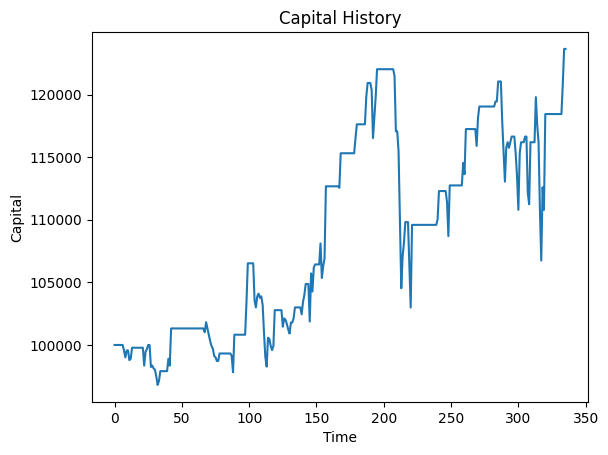

초기 자본금: 100000
최종 자본금: 123640
수익률: 23.64%


In [ ]:
# 초기 자본금 설정
initial_capital = 100000

# 보유 주식 수와 자본금 추적
shares_held = 0
capital = initial_capital
capital_history = [capital]

# 매수, 매도, 또는 보유 결정에 따른 자본금 변화 계산
for i in range(1, len(df)):
    if df['rsi_signal'][i] == 1:  # Buy 시그널인 경우
        shares_to_buy = capital // df['Close'][i]  # 보유 가능한 주식 수 계산
        shares_held += shares_to_buy
        capital -= shares_to_buy * df['Close'][i]

    elif df['rsi_signal'][i] == -1:  # Sell 시그널인 경우
        capital += shares_held * df['Close'][i]  # 보유 주식 매도
        shares_held = 0

    capital_history.append(capital + shares_held * df['Close'][i])  # 자본금 변화 추적

# 수익률 계산
returns = (capital_history[-1] - initial_capital) / initial_capital * 100

# 시각화
plt.plot(capital_history)
plt.title("Capital History")
plt.xlabel("Time")
plt.ylabel("Capital")
plt.show()

# 결과 출력
print("초기 자본금:", initial_capital)
print("최종 자본금:", capital_history[-1])
print("수익률: {:.2f}%".format(returns))


ga알고리즘으로 최적화했을 때의 수익률

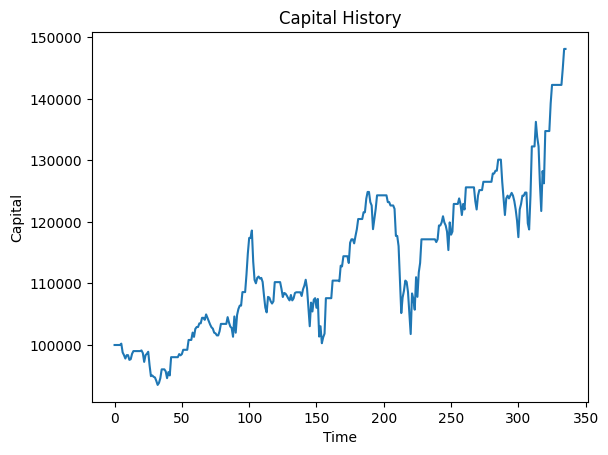

초기 자본금: 100000
최종 자본금: 148130
수익률: 48.13%


In [ ]:
# 초기 자본금 설정
initial_capital = 100000

# 보유 주식 수와 자본금 추적
shares_held = 0 # 보유 주식 수
capital = initial_capital # 초기 자본금으로 초기화
capital_history = [capital] # 자본금 기록용 배열

# 매수, 매도, 또는 보유 결정에 따른 자본금 변화 계산
for i in range(1, len(df)):
    if df['ga_signal'][i] == 1:  # Buy 시그널인 경우
        shares_to_buy = capital // df['Close'][i]  # 매수 가능한 주식 수 계산
        shares_held += shares_to_buy               # 보유 주식수 업데이트
        capital -= shares_to_buy * df['Close'][i]  # 매수한 만큼 자본금 감소
    elif df['ga_signal'][i] == -1:  # Sell 시그널인 경우
        capital += shares_held * df['Close'][i]  # 보유 주식 매도 후 매도한 만큼 자본금 증가
        shares_held = 0                          # 보유 주식은 0으로 초기화 : 다 팔 았 다

    capital_history.append(capital + shares_held * df['Close'][i])  # 자본금 변화 추적

# 수익률 계산
returns = (capital_history[-1] - initial_capital) / initial_capital * 100   # 최종 자본금 - 초기 자본금 / 초기 자본금 * 100
returns = (capital_history[-1] - initial_capital) / initial_capital * 100   # 최종 자본금 - 초기 자본금 / 초기 자본금 * 100

# 시각화
plt.plot(capital_history)
plt.title("Capital History")
plt.xlabel("Time")
plt.ylabel("Capital")
plt.show()

# 결과 출력
print("초기 자본금:", initial_capital)
print("최종 자본금:", capital_history[-1])
print("수익률: {:.2f}%".format(returns))


------------------
# 테스트 데이터, 학습 데이터로 분리하여 백테스트

학습 데이터, 테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
num_of_train = int(len(df) * 0.7) # 데이터의 전체 길이의 70%에 해당하는 길이값을 구한다.
num_of_test = int(len(df) - num_of_train) # 전체 길이에서 70%에 해당하는 길이를 뺀다.

df_train = df[:num_of_train].copy() # 전체 데이터 중에서 70%만큼 앞의 데이터 저장
df_test = df[(num_of_train-2):].copy() # 전체 데이터 중에서 30%만큼 뒤의 데이터 저장    # RSI 계산을 염두하여 2일+(처음 2일은 NaN값이니까)

print('훈련 데이터의 크기 :',len(df_train))
print('테스트 데이터의 크기 :',len(df_test))

훈련 데이터의 크기 : 235
테스트 데이터의 크기 : 103


RSI 시그널 변환, MDD

In [ ]:
# RSI 계산
rsi_period = 2  # RSI 기간 설정 (일반적으로 14일을 사용)
df_train['rsi'] = talib.RSI(df_train['MKTCAP'], timeperiod=rsi_period)

# 시그널 생성
df_train['rsi_signal'] = 0  # 초기 시그널은 0으로 설정
df_train.loc[df['rsi'] > 70, 'rsi_signal'] = -1  # RSI가 70 이상이면 Sell 시그널 (-1)
df_train.loc[df['rsi'] < 30, 'rsi_signal'] = 1  # RSI가 30 이하이면 Buy 시그널 (1)

#MDD
# 1년간 영업일은 252일로 잡아서 window = 252로 설정
window = 252

# 2. kospi 종가에서 1년기간 단위 최고치 peak를 구함
peak = df_train['Close'].rolling(window, min_periods=1).max()

# 3. kospi 최고치 대비 현재 kospi 종가가 얼마나 하락했는지 구함
drawdown = df_train['Close']/peak - 1.0

# 4. drawdown에서 1년기간 단위로 최저치 max_dd를 구한다.
# max_dd는 마이너스 값이기에 최저치가 MDD가 된다.
max_dd = drawdown.rolling(window, min_periods=1).min()
mdd = max_dd.min()
print(mdd)


-0.19901960784313721


GA

In [ ]:
# ga 최적화 함수
def ga_optimize():
  def fitness_func(ga_instance, solution, solution_idx):
      # 솔루션 : 매개변수 값으로 구성, RSI의 임계값을 나타냄
      # 매개변수 범위 제한 : solution 배열의 값들을 solution_lowerbound와 solution_upperbound 사이의 범위로 제한
      solution_lowerbound = [10, 30]
      solution_upperbound = [70, 90]
      solution = np.clip(solution, solution_lowerbound, solution_upperbound)

      rsi_buy_threshold = solution[0]
      rsi_sell_threshold = solution[1]

      # 매수 및 매도 시그널에 따라 수익률 계산
      df_train['return'] = df_train['MKTCAP'].pct_change() # pct_change : (다음행 - 현재행)÷현재행 백분율

      # 효림 언니가 보내준 거 : (현재 주식 가격/매수한 주식 가격) * 100 - 100
      #df['return'] = (df['MKTCAP'].shift(-1) / df['MKTCAP']) * 100 -100
      df_train['strategy_return'] = df_train['return'] * df_train['rsi_signal'].shift()   #shift : 한 칸 밑으로 내림

      # 전략의 평균 수익률을 최대화하는 것이 목표이므로, 음수로 변환하여 최소화 문제로 만듦
      fitness = df_train['strategy_return'].mean()

      return fitness

  # PyGAD 옵션 설정
  init_range_low = 0       #초기 모집단의 유전자 값이 선택되는 랜덤 범위의 하한값. 기본값 : -4
  init_range_high = 100
  # init_range_low는 0 init_range_high는 100이므로 초기 모집단의 유전자 값은 0에서 100 사이의 임의의 값.
  num_generations = 10  # 세대 수
  num_parents_mating = 10  # 부모 개체 수
  sol_per_pop = 20  # 개체 수
  parent_selection_type = "rws"
  mutation_type = "random"

  #callback : 사용 안 함
  def callback_generation(ga_instance):
      global last_fitness
      print("Generation = {generation}".format(generation=ga_instance.generations_completed))
      print("Best Fitness    = {fitness}".format(fitness=-best_fitness))
      print("Best RSI Buy Threshold     = {bt}".format(bt=best_rsi_buy_threshold))
      print("Best RSI Sell Threshold     = {st}".format(st=best_rsi_sell_threshold))


  # PyGAD GA 객체 생성
  ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        sol_per_pop=sol_per_pop,
                        num_genes=2,  # 매개변수 수
                        init_range_low=init_range_low,
                        init_range_high=init_range_high,
                        fitness_func=fitness_func,
                        parent_selection_type=parent_selection_type,
                        mutation_type=mutation_type,
                        #on_generation=callback_generation,
                        )

  # 최적의 솔루션 도출
  best_solution = ga_instance.best_solution()
  best_fitness = ga_instance.best_solution()[1]
  best_rsi_buy_threshold = best_solution[0][0]
  best_rsi_sell_threshold = best_solution[0][1]

  # 최적화 실행
  ga_instance.run()

  return best_rsi_sell_threshold, best_rsi_buy_threshold


#ga_optimize() # 튜플로 반환됨

#-------------------------------------ga 바탕 rsi signal----------------------------------------------
# 시그널 생성 함수
def make_ga_signal(best_rsi_sell_threshold, best_rsi_buy_threshold):
  # 시그널 생성
  df_train['ga_signal'] = 0  # 초기 시그널 값을 0으로 설정

  # RSI 값이 최적화된 매도 임계값을 초과하면 시그널 값 : -1
  # df['rsi'] > best_rsi_sell_threshold 조건을 충족하는 행들에 대해, ga_signal 컬럼 값을 -1로 변경
  df_train.loc[df_train['rsi'] > best_rsi_sell_threshold, 'ga_signal'] = -1

  # RSI 값이 최적화된 매수 임계값을 하회하면 시그널 값 : 1
  # df['rsi'] > best_rsi_buy_threshold 조건을 충족하는 행들에 대해, ga_signal 컬럼 값을 1로 변경
  df_train.loc[df_train['rsi'] < best_rsi_buy_threshold, 'ga_signal'] = 1

  return df_train['ga_signal']


#-------------------------------------Backtesting-----------------------------------------
# 원래는 학습, 테스트 데이터 분리해서 하려고 했는데 시간관계상 그냥 한 데이터로 함.
def backtesting():
  # 초기 자본금 설정
  initial_capital = 10000

  # 보유 주식 수와 자본금 추적
  shares_held = 0
  capital = initial_capital
  capital_history = [capital]

  # 매수, 매도, 또는 보유 결정에 따른 자본금 변화 계산
  for i in range(1, len(df_train)):
      if df_train['ga_signal'][i] == 1:  # Buy 시그널인 경우
          shares_to_buy = capital // df_train['Close'][i]  # 보유 가능한 주식 수 계산
          shares_held += shares_to_buy
          capital -= shares_to_buy * df_train['Close'][i]
      elif df_train['ga_signal'][i] == -1:  # Sell 시그널인 경우
          capital += shares_held * df_train['Close'][i]  # 보유 주식 매도
          shares_held = 0

      capital_history.append(capital + shares_held * df_train['Close'][i])  # 자본금 변화 추적

  # 수익률 계산
  returns = (capital_history[-1] - initial_capital) / initial_capital * 100

  return returns


  # 임계값 조정 : 백테스팅으로 수익률이 가장 높은 놈으로 Sell, Buy 임계값을 설정

#-------------------------------최고 수익률을 내는 임계값-----------------------------
thres_sell = [0] * 5
thres_buy = [0] * 5
rate = [0] * 5

for i in range(5):
  # ga 최적화
  thres_sell[i] = ga_optimize()[0].item()
  thres_buy[i] = ga_optimize()[1].item()

  # 시그널 생성
  make_ga_signal(thres_sell[i], thres_buy[i])

  # 수익률 확인
  rate[i] = backtesting()


# 수익률 최댓값 구하기
max_returns = max(rate)
max_index = rate.index(max(rate))

# 최종 임계값
result_thres = (thres_sell[max_index], thres_buy[max_index])

# 임계값과 수익률 출력
print(result_thres, max_returns)

# 시그널 갱신
make_ga_signal(thres_sell[max_index], thres_buy[max_index])





(61.6789884068644, 97.70548313220924) 31.2


0      0
1      0
2     -1
3     -1
4      1
      ..
230   -1
231   -1
232   -1
233   -1
234   -1
Name: ga_signal, Length: 235, dtype: int64

df_test의 rsi, rsi 시그널 생성(기본)

In [ ]:
# RSI 계산
rsi_period = 2  # RSI 기간 설정 (일반적으로 14일을 사용)
df_test['rsi'] = talib.RSI(df_test['MKTCAP'], timeperiod=rsi_period)

# 시그널 생성
df_test['rsi_signal'] = 0  # 초기 시그널은 0으로 설정
df_test.loc[df_test['rsi'] > 70, 'rsi_signal'] = -1  # RSI가 70 이상이면 Sell 시그널 (-1)
df_test.loc[df_test['rsi'] < 30, 'rsi_signal'] = 1  # RSI가 30 이하이면 Buy 시그널 (1)

# 인덱스 초기화
df_test = df_test.reset_index()

# 첫 이틀은 제거
df_test = df_test.drop(index = [0, 1], axis=0)

# 인덱스 초기화
df_test = df_test.reset_index()

In [ ]:
df_test

,level_0,index,Timestamp,Close,FLUC_TP_CD,CMPPREVDD_PRC,FLUC_RT,Open,High,Low,Volume,ACC_TRDVAL,MKTCAP,LIST_SHRS,rsi,rsi_signal,return,strategy_return,ga_signal
0,2,235,2022-05-31,11900,2,-150,-1.24,12050,12100,11850,293055,3492355350,332384493000,27931470,0.000000,1,-0.502463,0.502463,-1
1,3,236,2022-05-30,12050,1,200,1.69,11950,12150,11900,96191,1159286750,336574213500,27931470,100.000000,-1,-0.491119,0.491119,-1
2,4,237,2022-05-27,11850,3,0,0.00,11950,12000,11800,111027,1318303750,330987919500,27931470,27.272727,1,-0.517401,0.517401,1
3,5,238,2022-05-26,11850,1,50,0.42,11800,12050,11800,73542,876100150,330987919500,27931470,27.272727,1,-0.502463,-0.000000,1
4,6,239,2022-05-25,11800,2,-50,-0.42,11850,12000,11750,79303,939885000,329591346000,27931470,15.789474,1,-0.506261,-0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,98,331,2022-01-07,14600,1,350,2.46,14200,14650,14200,158132,2288627950,407799462000,27931470,99.553142,-1,-0.502463,0.502463,-1
97,99,332,2022-01-06,14250,2,-300,-2.06,14400,14600,14200,303389,4353750400,398023447500,27931470,21.892134,1,-0.524038,0.524038,1
98,100,333,2022-01-05,14550,2,-350,-2.35,14900,14900,14500,308187,4502918650,406402888500,27931470,66.582117,0,-0.483516,-0.483516,1
99,101,334,2022-01-04,14900,2,-50,-0.33,15000,15000,14750,235805,3507058650,416178903000,27931470,85.688479,-1,-0.480814,-0.000000,1


GA로 도출한 과거 임계값에 맞추어 새롭게 df_test의 ga_signal 생성

In [ ]:
# 시그널 생성
df_test['ga_signal'] = 0  # 초기 시그널 값을 0으로 설정

# RSI 값이 최적화된 매도 임계값을 초과하면 시그널 값 : -1
# df['rsi'] > best_rsi_sell_threshold 조건을 충족하는 행들에 대해, ga_signal 컬럼 값을 -1로 변경
df_test.loc[df_test['rsi'] > thres_sell[max_index], 'ga_signal'] = -1

# RSI 값이 최적화된 매수 임계값을 하회하면 시그널 값 : 1
# df['rsi'] > best_rsi_buy_threshold 조건을 충족하는 행들에 대해, ga_signal 컬럼 값을 1로 변경
df_test.loc[df_test['rsi'] < thres_buy[max_index], 'ga_signal'] = 1

df_test['ga_signal']

0      1
1     -1
2      1
3      1
4      1
      ..
96    -1
97     1
98     1
99     1
100    1
Name: ga_signal, Length: 101, dtype: int64

# **df_test로 테스트 매매**

그냥 rsi

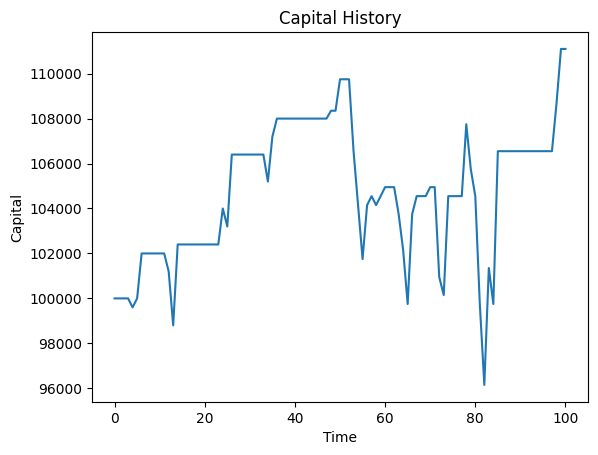

초기 자본금: 100000
최종 자본금: 111100
수익률: 11.10%


In [ ]:
# 초기 자본금 설정
initial_capital = 100000

# 보유 주식 수와 자본금 추적
shares_held = 0
capital = initial_capital
capital_history = [capital]

# 매수, 매도, 또는 보유 결정에 따른 자본금 변화 계산
for i in range(1, len(df_test)):
    if df_test['rsi_signal'][i] == 1:  # Buy 시그널인 경우
        shares_to_buy = capital // df_test['Close'][i]  # 보유 가능한 주식 수 계산
        shares_held += shares_to_buy
        capital -= shares_to_buy * df_test['Close'][i]

    elif df_test['rsi_signal'][i] == -1:  # Sell 시그널인 경우
        capital += shares_held * df_test['Close'][i]  # 보유 주식 매도
        shares_held = 0

    capital_history.append(capital + shares_held * df_test['Close'][i])  # 자본금 변화 추적

# 수익률 계산
returns = (capital_history[-1] - initial_capital) / initial_capital * 100

# 시각화
plt.plot(capital_history)
plt.title("Capital History")
plt.xlabel("Time")
plt.ylabel("Capital")
plt.show()

# 결과 출력
print("초기 자본금:", initial_capital)
print("최종 자본금:", capital_history[-1])
print("수익률: {:.2f}%".format(returns))


GA로 테스트

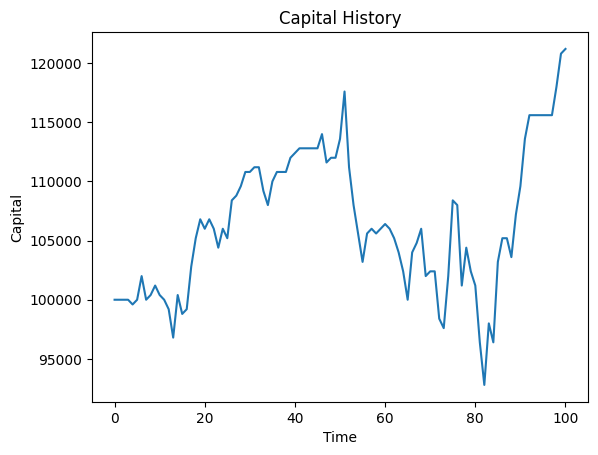

초기 자본금: 100000
최종 자본금: 121200
수익률: 21.20%


In [ ]:
# 초기 자본금 설정
initial_capital = 100000

# 보유 주식 수와 자본금 추적
shares_held = 0 # 보유 주식 수
capital = initial_capital # 초기 자본금으로 초기화
capital_history = [capital] # 자본금 기록용 배열

# 매수, 매도, 또는 보유 결정에 따른 자본금 변화 계산
for i in range(1, len(df_test)):
    if df_test['ga_signal'][i] == 1:  # Buy 시그널인 경우
        shares_to_buy = capital // df_test['Close'][i]  # 매수 가능한 주식 수 계산
        shares_held += shares_to_buy               # 보유 주식수 업데이트
        capital -= shares_to_buy * df_test['Close'][i]  # 매수한 만큼 자본금 감소
    elif df_test['ga_signal'][i] == -1:  # Sell 시그널인 경우
        capital += shares_held * df_test['Close'][i]  # 보유 주식 매도 후 매도한 만큼 자본금 증가
        shares_held = 0                          # 보유 주식은 0으로 초기화 : 다 팔 았 다

    capital_history.append(capital + shares_held * df_test['Close'][i])  # 자본금 변화 추적

# 수익률 계산
returns = (capital_history[-1] - initial_capital) / initial_capital * 100   # 최종 자본금 - 초기 자본금 / 초기 자본금 * 100
returns = (capital_history[-1] - initial_capital) / initial_capital * 100   # 최종 자본금 - 초기 자본금 / 초기 자본금 * 100

# 시각화
plt.plot(capital_history)
plt.title("Capital History")
plt.xlabel("Time")
plt.ylabel("Capital")
plt.show()

# 결과 출력
print("초기 자본금:", initial_capital)
print("최종 자본금:", capital_history[-1])
print("수익률: {:.2f}%".format(returns))


수익률 공식 수정(X)

---



In [ ]:
df['return'] = (df['MKTCAP'].shift(-1) / df['MKTCAP']) * 100 - 100
df['strategy_return'] = df['return'] * df['rsi_signal'].shift()   #shift : 한 칸 밑으로 내림

df